# MAC0318 - Aprendizado Supervisionado - Notebook 1

*Pré-requisitos*: 
- **Software**: Para rodar este notebook corretamente, você deve ter o Python na versão 3.9 ou mais recente e as bibliotecas NumPy e Tensorflow instaladas. Se você não conseguir ou quiser instalar o Tensorflow em seu computador, é possível rodá-lo na nuvem usando o [Google Colab](colab.research.google.com), como descrito na respectiva seção abaixo. 
- **Conhecimento**: Esta atividade assume familiaridade com o uso de notebooks Jupyter, a manipulação de matrizes usando a bilbioteca NumPy e conhecimento de derivadas parciais de funções multivariadas, além de conceitos elementares de otimização de funções. Recomendamos seguir algum tutorial da internet antes de realizar essa atividade, se esse não for o seu caso.

<span style="color:blue">Se você está rodando o notebook em sala de aula, você deve ativar o ambiente `duckietown` do conda antes de abrir o jupyter notebook e escolher o kernel `duckietown`, para que os requerimentos sejam satisfeitos.</red>

In [84]:
# Vamos começar carregando algumas bibliotecas necessárias

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Aprendizado supervisionado

Um **problema de aprendizado supervisionado** consiste de:

- Um conjunto de dados de entrada saída $\{(x_1,y_1),\ldots,(x_N,y_N)\}$.
- Uma classe de hipóteses $y=f(x) \in \mathcal{H}$; em geral assumimos que $y_i = f(x_i) + \epsilon$, onde $\epsilon$ é um *ruído*.
- Função de avaliação $J(f): \mathcal{H} \rightarrow \mathbb{R}$

Uma solução para o problema consiste de um **algoritmo de aprendizado** que recebe um conjunto de dados e a função de avaliação e devolve uma função da classe de hipóteses.

## Regressor linear simples

Um dos problemas mais simples de aprendizado supervisionado é o problema de regressão linear simples. Para esse problema temos

- Saída unidimensional $y_i \in \mathbb{R}$
- Classe de hipótese de funcões lineares $\mathcal{H} = \{ f(x) = b + w^t \cdot x  \mid b \in \mathbb{R}, w \in \mathbb{R}^{d} \}$
- Função de avaliação quadrática $J(f) = \frac{1}{2N}\sum_{i=1}^N (y_i - f(x_i))^2$

Vamos ver um exemplo muito simples de regressão linear simples, cujos dados de entrada $x_i$ são unidimensionais.

### Dados de treino

Como de costume, vamos representar os dados de entrada por um vetor $x$ e os dados de saída por outro vetor $y$. Note que os vetores são pareados no sentido de que o par de valores de mesma coordenada, como $x_i,y_i$, constituem um exemplo.

In [85]:
# Entrada
x = np.array([1, 2, 2.5, 3, 3.5, 4.5, 4.7, 5.2, 6.1, 6.1, 6.8])

# Saída
y = np.array([1.5, 1, 2, 2, 3.7, 3, 5, 4, 5.8, 5, 5.7])

# Tamanho do conjunto (quantidade de instâncias/exemplos)
N = len(x)

Vamos "ver" os dados

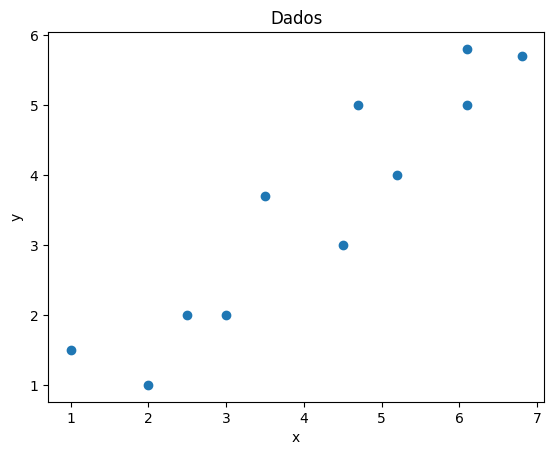

In [86]:
# Gráfico de dispersão
plt.scatter(x,y);
# Título
plt.title("Dados");
# Nomear eixos
plt.xlabel("x");
plt.ylabel("y");
# plt.savefig("dados.png") # Descomente se quiser salvar a imagem em formato PNG

### Classe de hipóteses

Vamos assumir a classe de funções lineares $f(x) = b + wx$, parametrizadas por valores reais $b$ e $w$.

O parâmetro $b$ é conhecido como viés ou intercepto (*bias*) e o parâmetro $w$ é chamado de peso ou coeficiente de regressão (*slope*). 

In [87]:
H = lambda b,w: lambda x: b + w*x

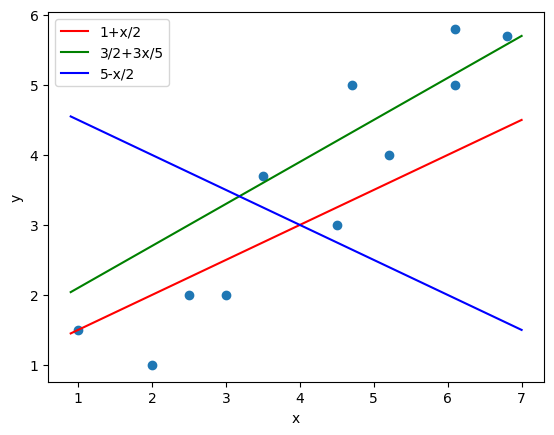

In [88]:
# Exemplos de hipóteses
f_ex1 = H(1,.5)   # 1 + 0.5x
f_ex2 = H(1.5,.6) # 1.5 + 0.6x
f_ex3 = H(5,-.5)  # 5 - 0.5x

# Domínio
X = np.linspace(0.9,7,2)

# Exibir função
plt.plot(X,f_ex1(X),c="r",label="1+x/2")
plt.plot(X,f_ex2(X),c="g",label="3/2+3x/5")
plt.plot(X,f_ex3(X),c="b",label="5-x/2")
plt.legend()

# Exibir dados
plt.scatter(x,y);

# Nomear eixos
plt.xlabel("x");
plt.ylabel("y");

### Função de avaliação

A função de avaliação mais comum é o erro quadrático médio, dado por
$$
J(x,y) = \frac{1}{N}\sum_{i=1}^N (y_i-f(x_i))^2
$$

In [89]:
J = lambda f: 0.5*np.sum((f(x)-y)**2)/N

In [90]:
J(f_ex1), J(f_ex2), J(f_ex3)

(np.float64(0.4915909090909091),
 np.float64(0.3948363636363636),
 np.float64(3.2997727272727273))

Vamos visualizar como curvas de nível a função de avaliação $J(b,x)$ parametrizada pelos valores de viés e peso

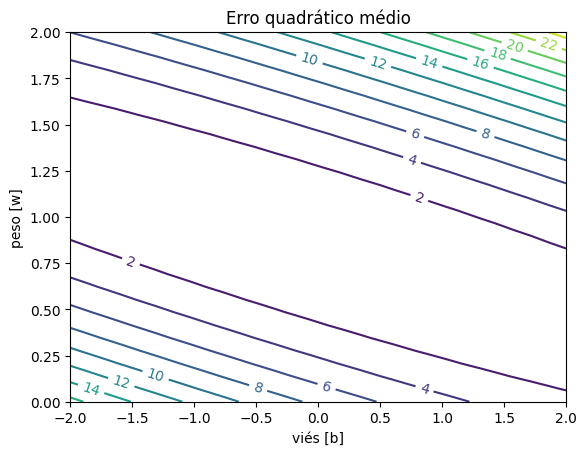

In [91]:
B,W = np.meshgrid(np.linspace(-2,2,30),np.linspace(0,2,30)) # Espaço paramétrico

V = np.zeros(B.shape)

for i in range(B.shape[0]):
    for j in range(B.shape[1]):
        V[i,j] = J(H(B[i,j], W[i,j]))

fig, ax = plt.subplots();
CS = ax.contour(B, W, V, 15);
ax.clabel(CS, inline=True, fontsize=10);
ax.set_xlabel('viés [b]');
ax.set_ylabel('peso [w]');
ax.set_title('Erro quadrático médio');
ax.set_title('Erro quadrático médio');


Vamos gerar algumas funções na classe de hipótese e analisá-las em relação ao custo

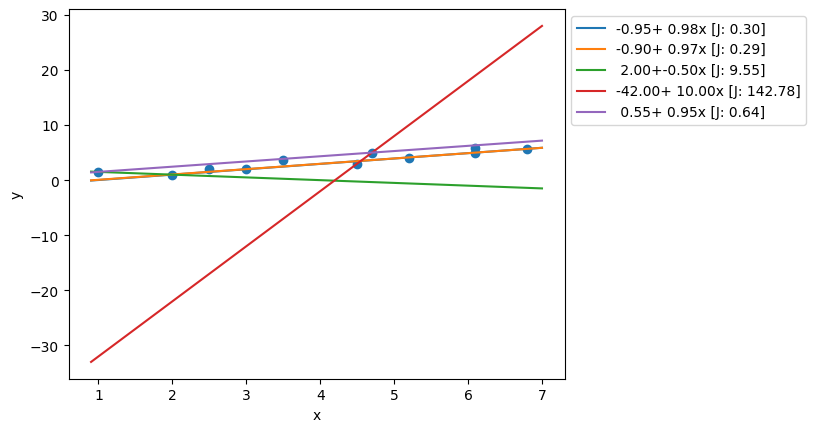

In [92]:
fig, ax = plt.subplots()
plt.xlabel("x")
plt.ylabel("y")

X = np.linspace(0.9,7,2)

for _ in range(5):
    # Selecionamos dois pontos quaisquer de treino
    i = np.random.randint(0, N-1, 2)
    # E calculamos reta que passa por eles
    w = (y[i[0]] - y[i[1]])/(x[i[0]]-x[i[1]])
    b = y[i[0]] - w*x[i[0]]
    # Função linear correspondente
    f = H(b,w)
    # Avaliação
    loss = J(f)
    # Exibir no gráfico
    plt.plot(X,f(X),label=f"{float(b): 3.2f}+{float(w): 3.2f}x [J: {loss:.2f}]")

# Mostrar dados para comparação
plt.scatter(x,y);
plt.legend(bbox_to_anchor=(1,1), loc="upper left");

### Algoritmo de aprendizado

Um algoritmo de aprendizado recebe um conjunto de dados rotulados, $\{ (x_i,y_i) \}$ e escolhe uma função dentro da classe de hipóteses de forma a minimizar uma função de custo $J$. Um algoritmo simples mas muito efetivo para aprendizado em classes de hipóteses contínuas e sem restrições é o de descida do gradiente, que realiza uma busca gulosa de subida de encosta no espaço de parâmetros de modelos (hipóteses).

#### Descida do gradiente

Encontra mínimo local de uma função diferenciável $J(w)$, parametrizada por vetor $w$, na vizinhança da solução inicial $w^{(0)}$ seguindo a cada passo a direção de maior "inclinação", dada pelo gradiente $\nabla J(w)$:


&nbsp;&nbsp;&nbsp; 1: &nbsp; Escolha solução inicial $w^{(0)}$ <br>
&nbsp;&nbsp;&nbsp;    2: &nbsp; <b>para</b> k = 0, 1, 2, ... <b>faça</b> <br>
&nbsp;&nbsp;&nbsp;    3:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $g^{(k)}$ = $\nabla J(w^{(k)})$ <br>
&nbsp;&nbsp;&nbsp;    4:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; escolha $\eta_k$ que minimize $J(w^{(k)}-\eta_k g^{(k)})$ <br>
&nbsp;&nbsp;&nbsp;    5:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $w^{(k+1)} = w^{(k)} - \eta_k g^{(k)}$ <br>


Na prática o passo 4 é realizado escolhendo $\eta_k$ através de uma heurística.

### Gradiente de erro quadrático médio para função linear

Para $f(x)=b+wx$ e $J(f)=\frac{1}{2N}\sum_i (f(x)-y_i)^2$. O gradiente de $J$ em relação aos parâmetros é dado por:

$$
\nabla J (b,w) = \begin{bmatrix} \frac{\partial J(b+wx)}{\partial b} \\ \frac{\partial J(b+wx)}{\partial w} \end{bmatrix} = \frac{1}{N} \begin{bmatrix} \sum_{i=1}^N (f(x_i)-y_i) \\ \sum_{i=1}^N (f(x_i)-y_i)x_i \end{bmatrix}
$$

In [93]:
# Função de gradiente para hipótese linear

grad_J = lambda b, w: np.array([np.sum(b+w*x-y), np.sum((b+w*x-y)*x)/N])

In [94]:
# Gradiente de f(x) = 1 + x/2

grad_J(1.0, 0.5)

array([-5.  , -3.02])

Vamos tentar visualizar o gradiente $\nabla J: \mathbb{R}^2 \rightarrow \mathbb{R}^2$ como um mapa vetorial.

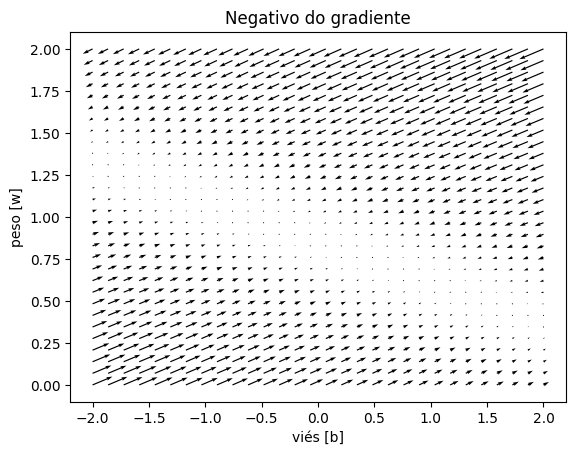

In [95]:
B,W = np.meshgrid(np.linspace(-2,2,30),np.linspace(0,2,30)) # Espaço paramétrico

U, V = np.zeros(B.shape), np.zeros(B.shape)

for i in range(B.shape[0]):
    for j in range(B.shape[1]):
        g = grad_J(B[i,j], W[i,j])
        U[i,j] = -g[0]
        V[i,j] = -g[1]

plt.xlabel('viés [b]')
plt.ylabel('peso [w]')
plt.title('Negativo do gradiente')

plt.quiver(B,W,U,V);

### Otimização

No caso da regressão linear simples com erro quadrático médio, existe apenas uma solução ótima (global), e o algoritmo de descida do gradiente converge para essa solução a partir de qualquer solução inicial, desde que a taxa de aprendizado $\eta_k$ seja pequena o suficiente.

Vamos encontrar a função linear ótima para nosso exemplo por meio da descida do gradiente.

In [96]:
w = 10*np.random.rand(2) # inicialização arbitrária dos parâmetros

k = 0   # no. de épocas

a = 0.01 # taxa de aprendizado (vamos usar um valor constante por simplicidade)


g = grad_J(w[0],w[1])

w_list, J_list = [w[:]], [J(H(w[0],w[1]))] # para exibir depois


while np.linalg.norm(g) > 1e-3:
    w -= a*g
    g = grad_J(w[0],w[1])
    w_list.append(w[:])
    J_list.append(J(H(w[0],w[1])))
    k = k + 1
    if k >= 500: # no. máximo de épocas
        break
print("Mínimo local em:", w)
print("Norma do gradiente:", np.linalg.norm(grad_J(w[0],w[1])))
print("Número de épocas:", k)

Mínimo local em: [-0.04910206  0.86363488]
Norma do gradiente: 0.031819909938445086
Número de épocas: 500


Vamos inspecionar o progresso do aprendizado por época desenhando as chamadas curvas de aprendizado, que exibem a qualidade do modelo estimado por época (ou seja, por iterações do algoritmo):

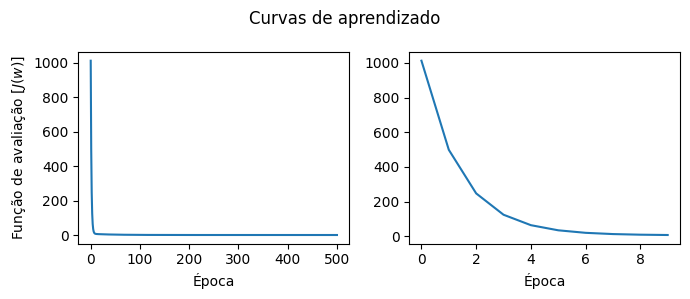

In [97]:
fig, ax = plt.subplots(1,2,figsize=(7,3))
# Esquerda: Para todas as épocas
ax[0].plot(J_list);
ax[0].set_ylabel('Função de avaliação [$J(w)$]')
ax[0].set_xlabel('Época')
# Direita: Apenas para primeiras 10 épocas
ax[1].plot(J_list[:10]);
ax[1].set_xlabel('Época')
plt.suptitle('Curvas de aprendizado')
plt.tight_layout()

Como é possível observar, para esse exemplo muito simples e com a taxa de aprendizado $\alpha=0.01$, o algoritmo converge em poucas épocas para uma solução próxima à ótima, porém leva um grande tempo até de fato convergir. Isso ocorre, pois ao se aproximar de um ótimo local (ponto estacionário) o gradiente se torna cada vez menor (norma próxima a zero) o que faz com que os passos de atualização dos parâmetros sejam cada vez menores. Existem técnicas para _acelerar_ e mitigar tais efeitos, porém não entraremos nesses detalhes aqui.

## 💡 Exercício 1

Modifique a taxa de aprendizado e rode o algoritmo de aprendizado novamente para investigar os efeitos. Em particular:

- Encontre uma taxa de aprendizado que faça o algoritmo divergir, ou seja, a função de avaliação aumenta ao invés de diminuir com as épocas
- Encontre uma taxa de aprendizado que faça o algoritmo convergir tão lentamente que ele encontra um valor ruim ao atingir o número máximo de épocas (500)

Mínimo local em: [5.50507287e+22 2.31131042e+22]
Norma do gradiente: 1.7948341132402176e+24
Número de épocas: 500


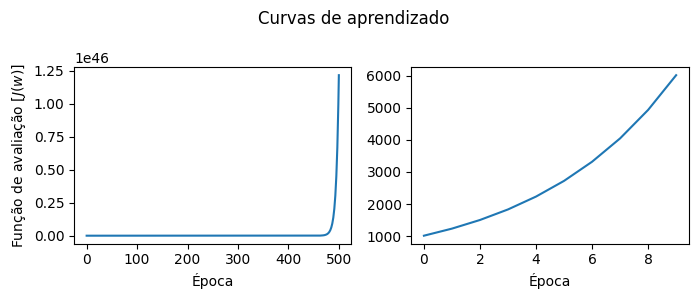

In [98]:
w = 10*np.random.rand(2) # inicialização arbitrária dos parâmetros
k = 0   # no. de épocas
a = 0.07 # taxa de aprendizado (vamos usar um valor constante por simplicidade)
g = grad_J(w[0],w[1])

w_list, J_list = [w[:]], [J(H(w[0],w[1]))] # para exibir depois

while np.linalg.norm(g) > 1e-3:
    w -= a*g
    g = grad_J(w[0],w[1])
    w_list.append(w[:])
    J_list.append(J(H(w[0],w[1])))
    k = k + 1
    if k >= 500: # no. máximo de épocas
        break
print("Mínimo local em:", w)
print("Norma do gradiente:", np.linalg.norm(grad_J(w[0],w[1])))
print("Número de épocas:", k)

fig, ax = plt.subplots(1,2,figsize=(7,3))
# Esquerda: Para todas as épocas
ax[0].plot(J_list);
ax[0].set_ylabel('Função de avaliação [$J(w)$]')
ax[0].set_xlabel('Época')
# Direita: Apenas para primeiras 10 épocas
ax[1].plot(J_list[:10]);
ax[1].set_xlabel('Época')
plt.suptitle('Curvas de aprendizado')
plt.tight_layout()

Mínimo local em: [5.81832404 3.31015967]
Norma do gradiente: 190.43045898972093
Número de épocas: 500


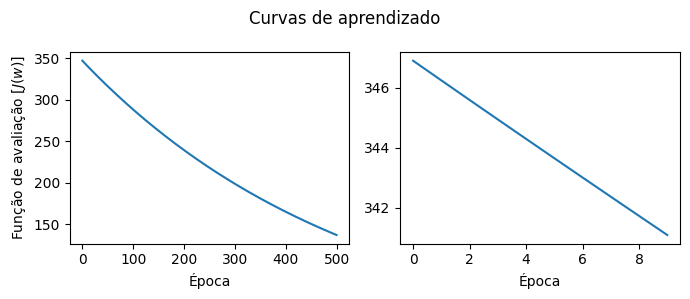

In [99]:
w = 10*np.random.rand(2) # inicialização arbitrária dos parâmetros
k = 0   # no. de épocas
a = 0.0665 # taxa de aprendizado (vamos usar um valor constante por simplicidade)
g = grad_J(w[0],w[1])

w_list, J_list = [w[:]], [J(H(w[0],w[1]))] # para exibir depois

while np.linalg.norm(g) > 1e-3:
    w -= a*g
    g = grad_J(w[0],w[1])
    w_list.append(w[:])
    J_list.append(J(H(w[0],w[1])))
    k = k + 1
    if k >= 500: # no. máximo de épocas
        break
print("Mínimo local em:", w)
print("Norma do gradiente:", np.linalg.norm(grad_J(w[0],w[1])))
print("Número de épocas:", k)

fig, ax = plt.subplots(1,2,figsize=(7,3))
# Esquerda: Para todas as épocas
ax[0].plot(J_list);
ax[0].set_ylabel('Função de avaliação [$J(w)$]')
ax[0].set_xlabel('Época')
# Direita: Apenas para primeiras 10 épocas
ax[1].plot(J_list[:10]);
ax[1].set_xlabel('Época')
plt.suptitle('Curvas de aprendizado')
plt.tight_layout()

### Solução ótima

Para essa simples escolha de hipótese e função de avaliação, podemos encontrar a solução ótima analiticamente (lembre-se que para esse caso há um único ponto de ótimo global, que é o ponto estacionário):
$$
\nabla J(b,w) = 0 \Leftrightarrow \begin{cases} b N + w \sum_i x_i = \sum_i y_i \\ b \sum_i x_i + w\sum_i x_i^2 = \sum_i x_i y_i \end{cases} .
$$

Note que as equações acima representam um sistema de duas equação e duas incógnitas cujo determinante é dado por

$$
 \det \begin{bmatrix} N & \sum_i x_i \\ \sum_i x_i & \sum_i x_i^2 \end{bmatrix} = N\sum_i x_i^2 - \left(\sum_i x_i\right)^2 \propto \hat{\mathrm{Var}}(X) ,
$$
onde $\hat{\mathrm{Var}}(X)$ denota a variância empírica da variável aleatória $X$. Portanto, o sistema possui solução sempre que a variável possuir variância positiva, ou seja, que os valores $x_i$ não forem constantes. Embora o sistema acima possua [solução em forma fechada conhecida](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line), vamos resolvê-lo numericamente.

In [100]:
# Matriz de coeficientes do sistema
A = np.array([[ N,       x.sum()      ],
              [ x.sum(), (x**2).sum() ]])
# Matrix de constantes
B = np.array([[ y.sum() ],[ (x*y).sum() ]])
# Solução
W = np.linalg.solve(A,B)

C:\Users\iagoc\AppData\Local\Temp\ipykernel_18596\1223743297.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(X,f(X),label=f"{float(W[0]): 3.2f}+{float(W[1]): 3.2f}x [J: {loss:.2f}]", color='r')


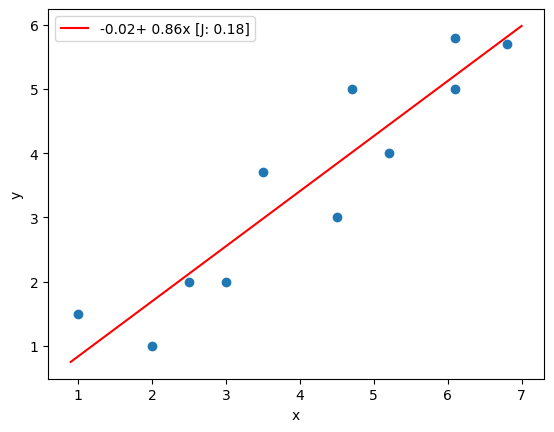

In [101]:
fig, ax = plt.subplots()
plt.xlabel("x")
plt.ylabel("y")

X = np.linspace(0.9,7,2)

# Função linear correspondente
f = H(W[0],W[1])
# Avaliação
loss = J(f)
# Exibir no gráfico
plt.plot(X,f(X),label=f"{float(W[0]): 3.2f}+{float(W[1]): 3.2f}x [J: {loss:.2f}]", color='r')
plt.legend()
# Mostrar dados para comparação
plt.scatter(x,y);

In [102]:
# Teste de otimalidade da solução: norma do gradiente para solução acima (deve ser virtualmente nula)

np.linalg.norm(grad_J(W[0],W[1]))

np.float64(4.312424926254752e-15)

A solução acima é tão próxima à encontrada pelo método do gradiente quanto possível numericamente. Isso não é coincidental: para o regressor linear simples com função de avaliação quadrática, o problema de otimização é convexo, o que faz com que só exista um ótimo local. Ademais, o algoritmo converge rapidamente para tal ótimo, como discutimos antes. É importante salientar que tais propriedades **não se estendem para problemas mais complexos**, envolvedos funções não-lineares e espaços de otimização não convexos. Neles, **o método do gradiente pode não convergir, e quando converge, pode obter uma solução subótima de baixa qualidade**.

## Regressor polinomial e regressor linear multivariado

Vamos repetir o exercício assumindo agora uma classe de hipóteses mais expressiva:

$$
\mathcal{H} = \{ b + w_1 x + w_2 x^2 + w_3 x^3 | (b,w_1,w_2,w_3) \in \mathbb{R}^4 \}
$$

A classe de hipóteses acima é equivalente a uma função linear no **espaço de atributos** $x' = (1,x,x^2,x^3)$. Para esse espaço de entrada, a classe de hipóteses acima é equivalente a $f(x)=\sum_{j=0} w_j x'_j$. As derivadas parciais são portanto obtidas de maneira análoga ao regressor simples:

$$
\frac{\partial J(\sum_j w_jx')}{\partial w_j} = \frac{1}{N} \sum_{i=1}^N (f(x_i')-y_i)x_i' 
$$

In [103]:
H2 = lambda w: lambda x: np.inner(w,x)

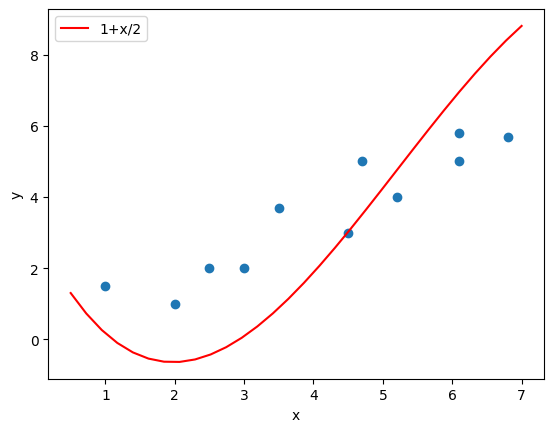

In [104]:
# Exemplo de hipótese: 3 - 4x - 1.25x**2 - 0.08x**3
f_ex = H2(np.array([3,-4,1.25,-0.08])) # Note que o modelo agora possui 4 parâmetros (entrada é 4-dimensional)

# Espaço de entrada original
X = np.linspace(0.5,7,30)

# Espaço de entrada aumentado (espaço de atributos)
Xp = np.array([np.ones(X.shape), X, X**2, X**3])

# Exibir função
plt.plot(X, f_ex(Xp.T), c="r",label="1+x/2")
plt.legend()

# Exibir dados
plt.scatter(x,y);

# Nomear eixos
plt.xlabel("x");
plt.ylabel("y");

### Autodiferenciadores

Arcabouços como [TensorFlow](https://www.tensorflow.org) e [PyTorch](https://pytorch.org) provêm diversas facilidades para realizar aprendizado de máquina de maneira eficiente. Uma das facilidades consiste em calcular o gradiente de maneira automática.

Vamos usar o TensorFlow para obter o gradiente do regressor polinomial. 

*Se você não conseguir ou quiser instalar a biblioteca, você pode usar o [Google Colab](https://colab.research.google.com) para executar o restante desse notebook. Lembre-se de logar usando sua conta USP para ter acesso a mais recursos computacionais.*

In [105]:
# Primeiros importamos a biblioteca (pode levar alguns segundos)

import tensorflow as tf # se isso falhar, tente fechar o jupyter, ativar o ambiente (conda activate duckietown) e abrí-lo novamente; 
                        # se ainda assim não conseguir, tente prosseguir usando o Google Colab como informado acima

In [106]:
# Variáveis são usadas para declarar parâmetros do modelo

#W = tf.Variable(np.random.randn(4), name="weights") # gera parâmetros aleatoriamente
W = tf.Variable(np.array([3,-4,1.25,-0.08]), name="weights") # gera parâmetros com valores iniciais dados

# Define o modelo: regressor linear multivariado
def linear_regression(x):
    return tf.tensordot(x, W, axes=1)

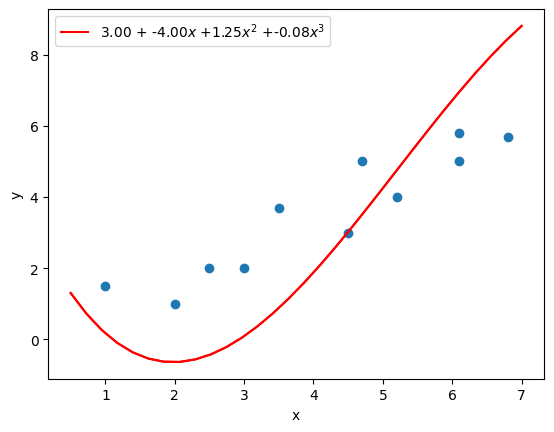

In [107]:
# Vamos usar o modelo inicial para predizer a saída
y_pred = linear_regression(Xp.T) 

# Vamos visualizar o resultado
plt.scatter(x,y);
plt.plot(X,y_pred, 'r');
w = W.numpy()
plt.plot(X,y_pred, 'r', label=f'{w[0]:.2f} + {w[1]:.2f}$x$ +{w[2]:.2f}$x^2$ +{w[3]:.2f}$x^3$');
plt.ylabel('y');
plt.xlabel('x');
plt.legend();

In [108]:
# Função de avaliação: Erro quadrático médio
def mean_square_error(y_pred, y_true):
    return tf.reduce_sum(tf.square(y_pred-y_true)) / (2 * N)

Vamos calcular o custo dado pela função de avaliação para o modelo inicial

In [109]:
# Dados transformados para espaço de atributos (espaço de entrada aumentado)
xx = np.array([np.ones(x.size), x, x**2, x**3]).T

# Computa erro no conjunto de dados
custo = mean_square_error( linear_regression(xx), y )

print('Custo:', float(custo))

Custo: 1.7031282758909063


Vamos otimizar os parâmetros pelo método da descida do gradiente

In [110]:
# Hiperparâmetros - guiam a otimização e são em geral escolhidos por tentativa e erro

alpha = 0.00005 # taxa de aprendizado - precisamos usar uma taxa pequena pois o custo cresce rapidamente para modelos inacurados
épocas = 1000 # no. de épocas - precisamos de muitas épocas pois estamos usando um alpha pequeno (e nenhuma técnica de aceleração)

for k in range(épocas):
    
    with tf.GradientTape() as g: # prepara as variáveis a serem atualizadas (W, no nosso caso)

        # Calcula a saída de acordo com o modelo atual
        y_pred = linear_regression(xx)

        # Calcula o custo das predições
        custo = mean_square_error(y_pred, y)

        # Calcula o gradiente (vetor de derivadas parciais) do custo com relação aos parâmetros do modelo
        gradientes = g.gradient(custo, [W])
        
        # Ajusta pesos de acordo com regra de descida do gradiente (gradiente * taxa de aprendizado)
        W.assign_sub(gradientes[0]*alpha)      
                
        # Exibe progresso a cada 50 épocas
        if k % 50 == 0:
            print(f"Época: {k} \t Custo: {custo.numpy()}")
            
print(f"Época: {k} \t Custo: {custo.numpy()}")

Época: 0 	 Custo: 1.7031282758909063
Época: 50 	 Custo: 1.3099166871335564
Época: 100 	 Custo: 1.2325232618534763
Época: 150 	 Custo: 1.161704046859576
Época: 200 	 Custo: 1.0968987454071082
Época: 250 	 Custo: 1.037594815110772
Época: 300 	 Custo: 0.9833233978151042
Época: 350 	 Custo: 0.9336555963641854
Época: 400 	 Custo: 0.8881990687042705
Época: 450 	 Custo: 0.8465949122728657
Época: 500 	 Custo: 0.8085148139330186
Época: 550 	 Custo: 0.7736584428202021
Época: 600 	 Custo: 0.7417510653982974
Época: 650 	 Custo: 0.7125413637855902
Época: 700 	 Custo: 0.6857994400260427
Época: 750 	 Custo: 0.6613149904575878
Época: 800 	 Custo: 0.6388956356799843
Época: 850 	 Custo: 0.6183653928604087
Época: 900 	 Custo: 0.5995632782452728
Época: 950 	 Custo: 0.5823420287806947
Época: 999 	 Custo: 0.5668690773082861


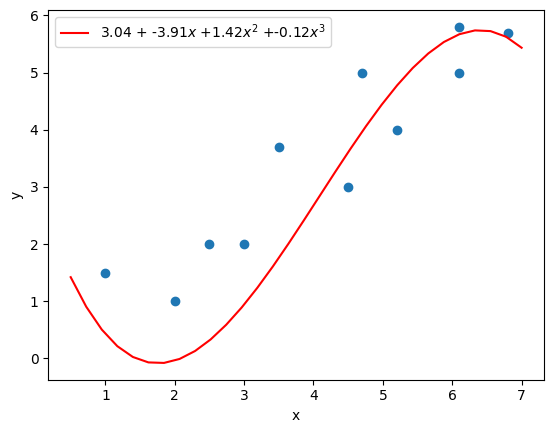

In [111]:
# Vamos usar o modelo aprendido para predizer a saída...
y_pred = linear_regression(Xp.T)

# ... e visualizar o resultado
plt.scatter(x,y);
w = W.numpy() # converte parâmetros para tipo de vetor multidimentionadl do numpy
plt.plot(X,y_pred, 'r', label=f'{w[0]:.2f} + {w[1]:.2f}$x$ +{w[2]:.2f}$x^2$ +{w[3]:.2f}$x^3$');
plt.ylabel('y');
plt.xlabel('x');
plt.legend();

## Função de ativação

Um dos problemas do regressor polinomial é que sua saída cresce rapidamente. Vamos assumir que sabemos que a função geradora dos dados nunca produz instâncias fora do intervalo $y \in [0,10]$, e portanto queremos *achatar* a saída do nosso modelo para que sua imagem se limite a tal intervalo. Uma maneira de condicionar a saída da função mantendo-a diferenciável é usando uma *função de ativação*, como por exemplo a função logística:

$$
\mathrm{sigmoide}(x) = \frac{C}{1 + e^{a-bx}}
$$

cujos parâmetros $C$, $a$ e $b$ ajustam a amplitude e a saturação da função

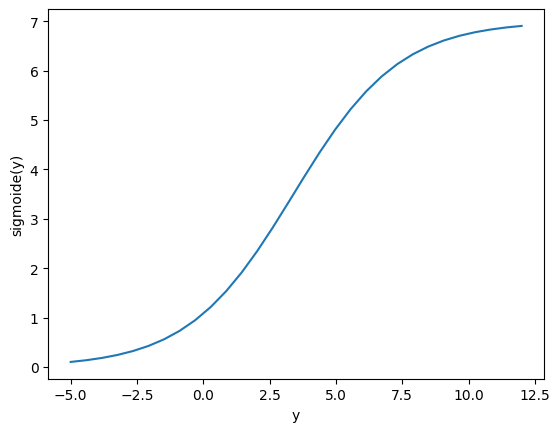

In [112]:
sigmoide = lambda x: 7/(1+np.exp(-0.5*x + 1.7))

y_sp = np.linspace(-5,12,30)

plt.plot(y_sp, sigmoide(y_sp));
plt.xlabel('y');
plt.ylabel('sigmoide(y)');

Vamos compor nosso regresso linear com a função sigmóide acima

In [113]:
W2 = tf.Variable(np.array([3,-4,1.25,-0.08])) # gera parâmetros com valores iniciais dados
A = tf.Variable(np.array(1.5)) # gera parâmetros com valores iniciais dados
B = tf.Variable(np.array(0.5)) # gera parâmetros com valores iniciais dados
C = tf.Variable(np.array(7.0)) # gera parâmetros com valores iniciais dados

# Define o novo modelo
def squashed_linear_regression(x):
    z = tf.tensordot(x, W2, axes=1)
    return C*tf.sigmoid(B*z-A) # equivalente a C/(1+tf.exp(A-B*z))    

Note que o resultado é um função não-linear em relação aos parâmetros, cujas derivadas não são tão simples de calcular. Por sorte, o TensorFlow pode calculá-las para nós.

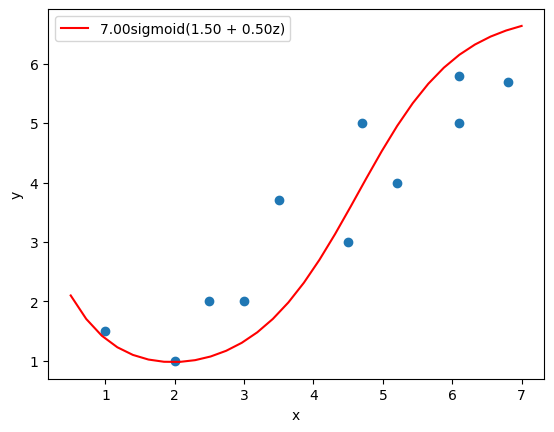

In [114]:
# Vamos usar o modelo inicial para predizer a saída
y_pred = squashed_linear_regression(Xp.T)

# Vamos visualizar o resultado
plt.scatter(x,y);
plt.plot(X,y_pred, 'r', label=f'{float(C):.2f}sigmoid({float(A):.2f} + {float(B):.2f}z)');
plt.xlabel('x');
plt.ylabel('y');
plt.legend();

In [115]:
# Computa erro no conjunto de dados
custo = mean_square_error( squashed_linear_regression(xx), y )

print('Custo:', float(custo))

Custo: 0.4282658758363505


In [116]:
# Vamos otimizar os parâmetros

épocas = 1000 # no. de épocas

alpha = 0.0001 # taxa de aprendizado - precisamos usar uma taxa pequena pois o custo cresce rapidamente para modelos inacurados

for k in range(épocas):
    
    with tf.GradientTape() as g: # prepara as variáveis a serem atualizadas (W, no nosso caso)

        # Calcula a saída de acordo com o modelo atual
        y_pred = squashed_linear_regression(xx)

        # Calcula o custo das predições
        custo = mean_square_error(y_pred, y)

        # Calcula o gradiente
        gradientes = g.gradient(custo, [W2, A, B, C])
        
        # Atualiza pesos
        W2.assign_sub(gradientes[0]*alpha)      
        A.assign_sub(gradientes[1]*alpha)      
        B.assign_sub(gradientes[2]*alpha)      
        C.assign_sub(gradientes[3]*alpha)      

                
        # Progresso
        if k % 50 == 0:
            print(f"Época: {k} \t Custo: {custo.numpy()}")
            
print(f"Época: {k} \t Custo: {custo.numpy()}")

Época: 0 	 Custo: 0.4282658758363505
Época: 50 	 Custo: 0.38390892883100486
Época: 100 	 Custo: 0.3725948175103206
Época: 150 	 Custo: 0.3618369106708468
Época: 200 	 Custo: 0.3516248494097216
Época: 250 	 Custo: 0.3419469036454913
Época: 300 	 Custo: 0.33279012199145386
Época: 350 	 Custo: 0.32414046982670913
Época: 400 	 Custo: 0.3159829592146482
Época: 450 	 Custo: 0.3083017734534491
Época: 500 	 Custo: 0.30108038821859806
Época: 550 	 Custo: 0.29430169050525434
Época: 600 	 Custo: 0.28794809592115217
Época: 650 	 Custo: 0.2820016643336775
Época: 700 	 Custo: 0.27644421344518216
Época: 750 	 Custo: 0.27125742955904397
Época: 800 	 Custo: 0.2664229746003545
Época: 850 	 Custo: 0.2619225883595744
Época: 900 	 Custo: 0.25773818492148437
Época: 950 	 Custo: 0.25385194230989244
Época: 999 	 Custo: 0.2503158560283081


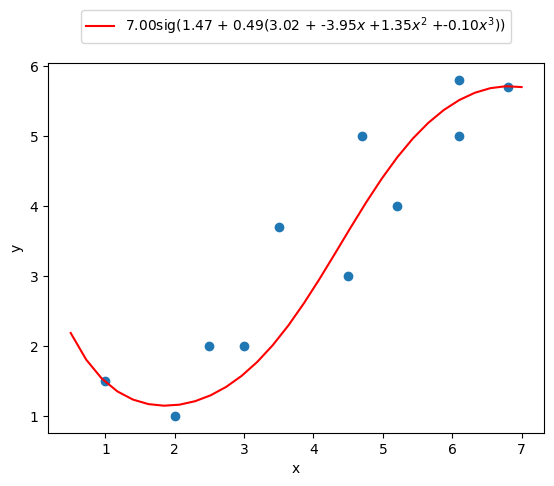

In [117]:
# Vamos usar o modelo aprendido para predizer a saída...
y_pred = squashed_linear_regression(Xp.T)

# ... e visualizar o resultado
plt.scatter(x,y);
w = W2.numpy()
plt.plot(X,y_pred, 'r', label=f'{float(C):.2f}sig({float(A):.2f} + {float(B):.2f}({w[0]:.2f} + {w[1]:.2f}$x$ +{w[2]:.2f}$x^2$ +{w[3]:.2f}$x^3$))');
plt.ylabel('y');
plt.xlabel('x');
plt.legend();
plt.legend(bbox_to_anchor=(.5,1.1), loc="center");

## 💡 Exercício 2

O algoritmo de descida do gradiente é muito sensível à escolha dos valores iniciais para os parâmetros. Nos experimentos acima, nós inciamos o algoritmo com valores relativamente próximos do ótimo. Na prática, raramente sabemos uma boa inicialização dos parâmetros.

1. Modifique os valores para o número de épocas e taxa de aprendizado para que o algoritmo obtenha um bom modelo quando iniciado com valores dos parâmetros gerados aleatoriamente. Reflita sobre a convergência do algoritmo (número de épocas necessário para bom desempenho) e sensibilidade à taxa de aprendizado quandos os parâmetros são incialiados aleatoriamente.

2. Execute o código várias vezes (portanto gerando diferentes inicializações aleatórias dos parâmetros) e repare em como o aprendizado é afetado (custo ao término do número de épocas, taxa de aprendizado para convergência etc). Procure encontrar uma inicialização que leve a um desempenho muito insatisfatório e uma a um desempenho bom, quando os demais hiperparâmetros são mantidos constantes (taxa de aprendizado, número de épocas).

3. Investigue o uso de heurística para taxa de aprendizado mais sofisticadas. Uma sugestão é usar uma função decrescente como:

$$
\alpha = \frac{\alpha_0}{1+C*k}
$$

onde $\alpha_0 \in (0,1)$ é uma constante de ganho, ajustada pelo valor da taxa de aprendizada na primeira época, $k$ é a época e $C$ é uma constante que regula o decaimento da taxa de aprendizado. Valores sugeridos são $\alpha_0 = 0.1$ e $C=0.05$

### SUA RESPOSTA

<span style="color:red">Copie a célula abaixo para responder aos itens 1 a 3 acima e escreva suas observações aqui</span>

#### 1)
Inicialmente foi bem problemático ajustar a quantidade de épocas para que alguns
a aproximação do modelo funcionasse para alguns dos valores aleatórios, e nisso
notei que a quantidade de épocas parece ter uma influência maior já que acaba
fornecendo mais possibilidade de que o modelo convirja corretamente. A taxa de
aprendizado afetou bastante a convergenência do modelo porém, quando exposta a
uma quantidade de épocas muito grande, ela convergia vez ou outra para um
modelo suficientemente próximo.

#### 2)
Para esse modelo com um certo grau de limitação das variáveis aleatórias, o
o modelo foi bem aproximado com os valores constantes de épocas=$5000$ e
$\alpha=0.009$. Foi testado várias vezes, e para a maioria dos valores
aleatórios apresentou um modelo próximo o suficiente para torná-lo satisfatório.

#### 3)
Descomentando a linha do código que implementa a taxa de aprendizado variável, é
possível perceber que o modelo converge bem mais rápido, permitindo que o número
de épocas seja reduzido.

Época: 0 	 Custo: 7.491267862422519
Época: 500 	 Custo: 1.3332984114171973
Época: 1000 	 Custo: 0.43555412210009853
Época: 1500 	 Custo: 0.2787801556866536
Época: 2000 	 Custo: 0.2798470083711556
Época: 2500 	 Custo: 0.27601633681027404
Época: 3000 	 Custo: 0.27516765190460063
Época: 3500 	 Custo: 0.2740361185003707
Época: 4000 	 Custo: 0.258575176410924
Época: 4500 	 Custo: 0.4004364947386399


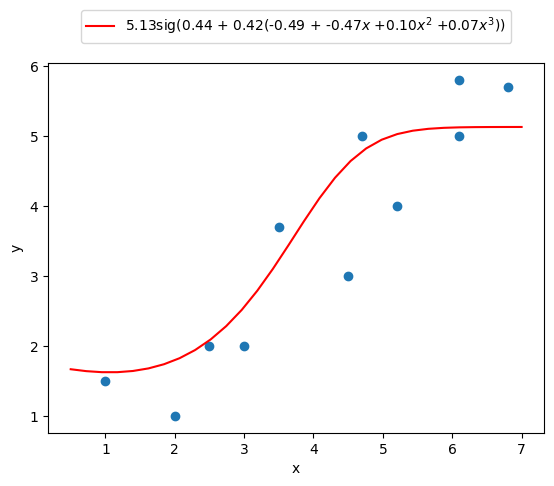

In [118]:
# Modelo criado com parâmetros aleatórios

w1 = tf.Variable(np.random.randn(4))
w2 = tf.Variable(np.random.randn(1))
w3 = tf.Variable(np.random.randn(1))
w4 = tf.Variable(np.random.randn(1))

# Define o novo modelo usando parâmetros acima
def squashed_linear_regression2(x):
    z = tf.tensordot(x, w1, axes=1)
    return w4*tf.sigmoid(w3*z-w2)

# Treino
epocas = 5000 # no de épocas precisa aumentar
alpha = 0.009 # taxa de aprendizado pode ser aumentada pois a solução inicial está longe do ótimo local

for k in range(epocas):
    with tf.GradientTape() as g: # prepara as variáveis a serem atualizadas (W, no nosso caso)
        # alpha = 0.1/(1+0.05*k) # descomente para usar uma taxa de aprendizado dinâmica

        # Predições com modelo atual
        y_pred = squashed_linear_regression2(xx)

        # Cálculo do custo
        custo = mean_square_error(y_pred, y)

        # Cálculo do gradiente
        gradientes = g.gradient(custo, [w1, w2, w3, w4])

        # Ajudeste de pesos
        w1.assign_sub(gradientes[0]*alpha)
        w2.assign_sub(gradientes[1]*alpha)
        w3.assign_sub(gradientes[2]*alpha)
        w4.assign_sub(gradientes[3]*alpha)

        # Progresso
        if k % 500 == 0:
            print(f"Época: {k} \t Custo: {custo.numpy()}")

y_pred = squashed_linear_regression2(Xp.T)
plt.scatter(x,y);
w = w1.numpy()
plt.plot(X,y_pred, 'r', label=f'{float(w4):.2f}sig({float(w2):.2f} + {float(w3):.2f}({w[0]:.2f} + {w[1]:.2f}$x$ +{w[2]:.2f}$x^2$ +{w[3]:.2f}$x^3$))');
plt.ylabel('y');
plt.xlabel('x');
plt.legend();
plt.legend(bbox_to_anchor=(.5,1.1), loc="center");


## Redes neurais

O modelo que construímos para a regressor polinomial (ou linear multivariado) com saída sigmoide exemplifica o conceito de unidade computacional em uma rede neural.

$$
\mathrm{neuronio}(x) = \sigma( w^t \cdot x + b ) \, ,
$$

onde $\sigma$ é uma função de ativação como a função sigmoide, $w$ são os pesos e $b$ é o viés ou constante. Note que $x$ e $w$ são vetores em $\mathbb{R}^d$ para alguma dimensão $d$. Uma camada de uma rede neural é composta por um conjunto de neurônios, que compartilham da mesma entrada $x$, mas possuem parâmetros $w$ e $b$ (possivelmente) distintos.

<figure style="text-align: center">
    <img src="img/neuronio.png" width=400>
</figure>

Especificar uma rede neural com vários neurônios por camada e várias camadas é uma tarefa laboriosa e sujeita a erros.
Por isso, o TensorFlow, assim como outros pacotes de aprendizado de máquina, possuem funções para facilitar e automatizar a criação de modelos complexos a partir da composição de funções pré-especificadas. A mais simples delas, chamada de *camada densa*, corresponde exatamente a um vetor de neurônios como definido acima.

Vamos recriar o modelo anterior usando as facilidades de criação de modelos do TensorFlow, usando um subpacote chamado Keras.

In [119]:
# Primeiro criamos uma camada de entrada, para representar o vetor de entrada
entrada = tf.keras.Input(shape=(4,)) # dimensão 4 correspondente à dimensão de nosso espaço de atributos (1,x,x**2,x**3)

# Depois criamos a camada intermediária, que computa sigmoide(W*x + b), com x sendo a entrada
z = tf.keras.layers.Dense(1, activation=tf.sigmoid)(entrada) # camada densa com 1 neurônio e função de ativação logística

# Por fim, criamos a camada de saída, que no nosso caso é apenas uma função linear
saída = tf.keras.layers.Dense(1)(z) # camada densa com 1 neurônio e função de ativação linear

# O modelo encapsula a composição de funções e recorda as camadas de entrada e saída, necessário para o aprendizado
modelo = tf.keras.Model(inputs=entrada, outputs=saída)

# Agora compilamos o modelo para produzir as derivadas com relação a 
# uma função de avaliação (loss) e um algoritmo de aprendizado 

alpha = 0.01 # taxa de aprendizado
# Vamos usar uma versão ainda mais gulosa do algortimo de descida do gradiente, chamado de SGD (Stochastic Gradient Descent)
modelo.compile(
        optimizer=tf.keras.optimizers.SGD(alpha), # algoritmo de aprendizado (atualização dos pesos)
        loss="mse" # função de custo de valiação - mse, mean squared error - usada para cálculo do gradiente
) 

In [120]:
# Otimizamos os parâmetros com o método fit, que recebe o número de épocas e a verbosidade
history = modelo.fit(xx,y, epochs=5000, verbose=0); # pode levar muitos segundos

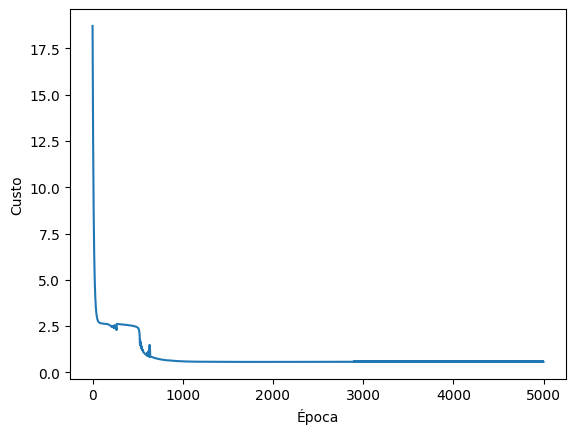

In [121]:
# Vamos analisar o resultado do aprendizado

plt.plot(history.history['loss']);
plt.xlabel('Época');
plt.ylabel('Custo');

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


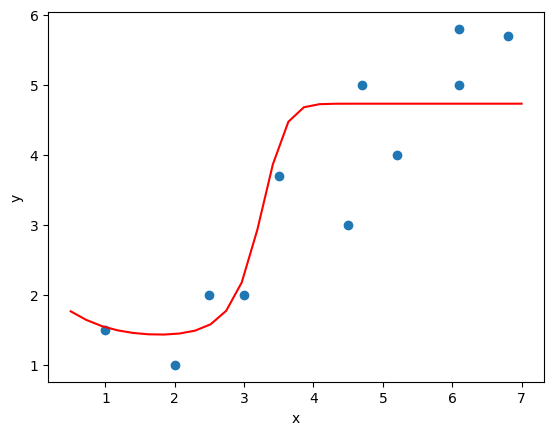

In [122]:
# Vamos usar o modelo aprendido para prever os dados...

y_pred = modelo.predict(Xp.T)

# ...e visualizar o resultado

plt.scatter(x,y);

plt.plot(X, y_pred, 'r')
plt.ylabel('y');
plt.xlabel('x');

Se a função aprendida acima for muito ruim, você pode tentar executar a geração de um modelo aleatório e repetir a otimização; como dito anteriormente, a otimização por descida do gradiente é muito afetada pela escolha inicial dos parâmetros. Um valor razoável de custo final para o modelo é de < 0.5 ou próximo disso.

### Uma rede mais complexa

Vamos agora construir uma rede neural mais complexa para prever os dados. A função [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) facilita a composição de modelos de várias camadas.

In [123]:
modelo2 = tf.keras.Sequential([
      tf.keras.Input(shape=(4,)), # camada de entrada
      tf.keras.layers.Dense(4, activation=tf.nn.relu), # camada oculta com 4 neurônios e função de ativação ReLu
      tf.keras.layers.Dense(4, activation=tf.nn.relu), # camada oculta com 4 neurônios e função de ativação ReLu
      tf.keras.layers.Dense(1) # Camada de saída
    ])

TensorFlow conta com [diversos otimizadores](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) além de descida do gradiente. Os outros otimizadores diferem em como realizam a atualização dos pesos e como usam a taxa de aprendizado, e são em geral mais efetivos que o método de descida de gradiente padrão.

Vamos usar o otimimzador conhecido como Adam.

In [124]:
modelo2.compile(loss='mse', optimizer='Adam')

In [125]:
# Otimizamos os parâmetros com o método fit - note o número reduzido de épocas
history = modelo2.fit(xx,y, epochs=1000, verbose=0);

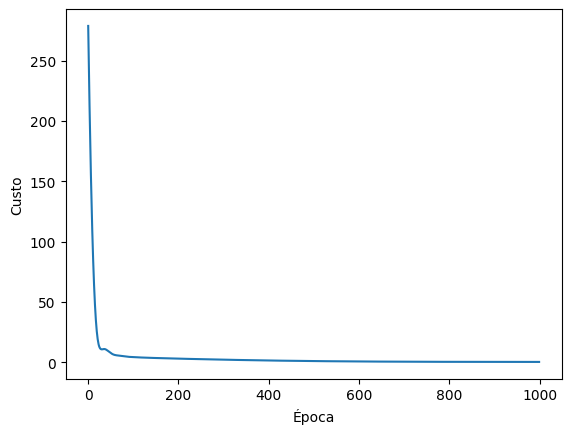

In [126]:
# Vamos analisar o resultado do aprendizado

plt.plot(history.history['loss']);
plt.xlabel('Época');
plt.ylabel('Custo');

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


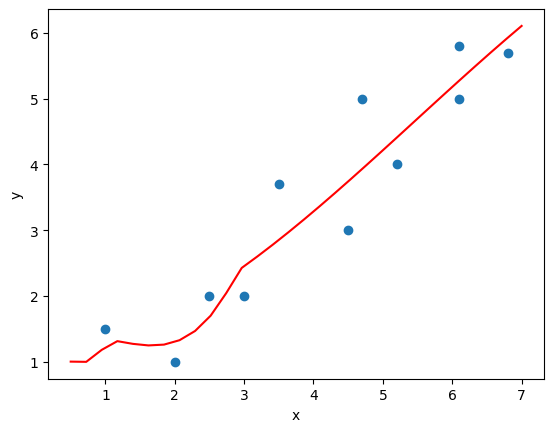

In [127]:
# Vamos usar o modelo aprendido para prever os dados...

y_pred = modelo2.predict(Xp.T)

# ...e visualizar o resultado

plt.scatter(x,y);

plt.plot(X, y_pred, 'r')
plt.ylabel('y');
plt.xlabel('x');

O resultado do aprendizado com o algoritmo Adam é em geral superior ao do método do gradiente (SGD); se a curva acima não se ajusta razoalvemente aos dados, tente repetir o processo de geração de parâmetros aleatórios e otimização dos parâmetros acima.

## 💡 Exercício 3

Modifique o código acima para investigar o efeito da escolha de arquitetura (número de neurônios por camada, número de camadas, funções de ativação em cada camada) na função aprendida. Responda as questões abaixo, ilustrando com curvas de aprendizado e valores de custo de modelos aprendidos. Devido à dependência da incialização do modelo na qualidade do modelo aprendido, é comum obter estimativas de valores médios sobre várias repetições (experimentos) de geração de parâmetros aleatórios e otimização.

1. Qual o efeito do aumento de complexidade da rede na função obtida?
2. Qual o efeito do aumento de complexidade da rede no aprendizado (convergência)?

### SUA RESPOSTA

<span style="color:red">Escreva suas respostas nas células abaixo</span>

Para as relações de neurônios/camada que criei, é possível notar que o aumento
de camadas forneceu aproximações melhores com menor custo, que também teve
bastante impacto pela ativação pois para a camada Relu[16, 16] é evidente
que está mais próxima que as outras 'relu', porém quando adicionamos mais uma
camada com 3/4 do total de neurônios variando as ativações, a Sigmoid chegou
perto da melhor (Tanh), com um custo aparentemente próximo de linear, mas ainda
pior que o da Relu[16, 16]. Dessa maneira acredito que o aumento da complexidade
(neurônios/camada), neste caso, gerou resultados melhores com menos custo.

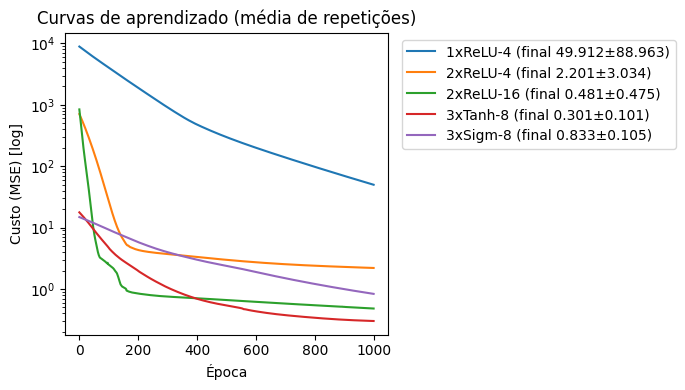

Resumo (custo final médio ± desvio):
- 1xReLU-4   | camadas=[4], ativ=relu    -> 49.9120 ± 88.9632
- 2xReLU-4   | camadas=[4, 4], ativ=relu    -> 2.2009 ± 3.0337
- 2xReLU-16  | camadas=[16, 16], ativ=relu    -> 0.4807 ± 0.4749
- 3xTanh-8   | camadas=[8, 8, 8], ativ=tanh    -> 0.3011 ± 0.1008
- 3xSigm-8   | camadas=[8, 8, 8], ativ=sigmoid -> 0.8330 ± 0.1054


In [ ]:
def modelo(layerSizes, activation='relu', learningRate=1e-3):
    m = tf.keras.Sequential()
    m.add(tf.keras.Input(shape=(4,)))

    for size in layerSizes:
        m.add(tf.keras.layers.Dense(size, activation=activation))

    m.add(tf.keras.layers.Dense(1))  # saída linear
    m.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=learningRate))
    return m

def treinarModelo(layerSizes, activation='relu', epocas=1000, repeticoes=5, learningRate=1e-3):
    historicos = []
    custos_finais = []
    for r in range(repeticoes):
        tf.keras.utils.set_random_seed(1234 + r)
        tf.keras.backend.clear_session()
        m = modelo(layerSizes, activation=activation, learningRate=learningRate)
        h = m.fit(xx, y, epochs=epocas, verbose=0)
        historicos.append(np.array(h.history['loss']))
        custos_finais.append(h.history['loss'][-1])

    min_len = min(len(h) for h in historicos)
    H = np.stack([h[:min_len] for h in historicos], axis=0)
    media = H.mean(axis=0)
    desvio = H.std(axis=0)
    return media, desvio, float(np.mean(custos_finais)), float(np.std(custos_finais))

configs = [
    #         neurônios por camada
    ("1xReLU-4",   [4],         'relu'),
    ("2xReLU-4",   [4,4],       'relu'),
    ("2xReLU-16",  [16,16],     'relu'),
    ("3xTanh-8",   [8,8,8],     'tanh'),
    ("3xSigm-8",   [8,8,8],     'sigmoid'),
]

epocas = 1000
repeticoes = 7
lr = 1e-3

res = []
plt.figure(figsize=(7,4))
for name, layers, act in configs:
    media, desvio, fimMed, fimStd = treinarModelo(layers, activation=act, epocas=epocas, repeticoes=repeticoes, learningRate=lr)
    res.append((name, layers, act, fimMed, fimStd))
    plt.semilogy(media, label=f"{name} (final {fimMed:.3f}±{fimStd:.3f})")

plt.xlabel("Época")
plt.ylabel("Custo (MSE) [log]")
plt.title("Curvas de aprendizado (média de repetições)")
plt.legend(bbox_to_anchor=(1.02,1), loc="upper left")
plt.tight_layout()
plt.show()

print("Resumo (custo final médio ± desvio):")
for name, layers, act, fm, fs in res:
    print(f"- {name:10s} | camadas={layers}, ativ={act:7s} -> {fm:.4f} ± {fs:.4f}")

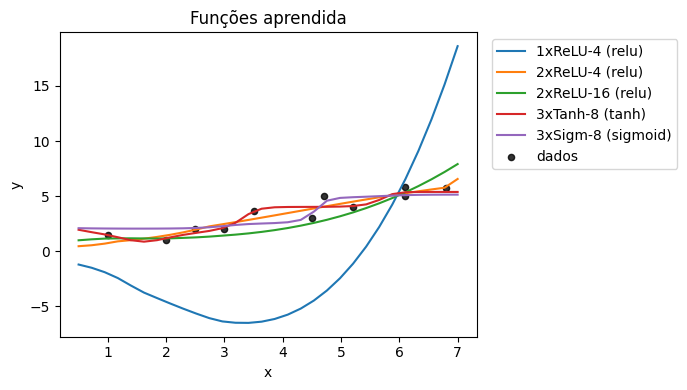

: 

In [ ]:
plt.figure(figsize=(7,4))
for name, layers, act in configs:
    tf.keras.utils.set_random_seed(42)
    tf.keras.backend.clear_session()
    m = modelo(layers, activation=act, learningRate=lr)
    _ = m.fit(xx, y, epochs=epocas, verbose=0)
    y_pred_grid = m.predict(Xp.T, verbose=0)
    plt.plot(X, y_pred_grid, label=f"{name} ({act})")

plt.scatter(x, y, c='k', s=20, alpha=0.8, label="dados")
plt.xlabel("x"); plt.ylabel("y")
plt.title("Funções aprendida")
plt.legend(bbox_to_anchor=(1.02,1), loc="upper left")
plt.tight_layout()
plt.show()